# Predictive Analytics and Customer Retention Strategy for Model Fitness


Model Fitness, a prominent gym chain, is facing a common yet critical challenge: customer churn. To enhance customer retention, the gym has digitized numerous customer profiles, providing a rich dataset for analysis. This project aims to leverage analytical data to predict churn, understand customer behaviors, and formulate effective retention strategies.

# Table of Contents


- [Desciption of the Data](#description) <br> 
- [Data Inspection](#isnpect) <br>
- [Exploratory Data Analysis](#eda) <br>
- [Model Building](#mb) <br>
- [Creating Clusters](#cluster) <br>
- [Conclusion](#conclusion)

## Description of the Data
<div id='description'></div>

- 'Churn' — the fact of churn for the month in question
- 'gender' - gender of clients
- 'Near_Location' — whether the user lives or works in the neighborhood where the gym is located
- 'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
- 'Promo_friends' — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
- 'Phone' — whether the user provided their phone number
- 'Age' - age of client
- 'Lifetime' — the time (in months) since the customer first came to the gym
- 'Contract_period' — 1 month, 3 months, 6 months, or 1 year
- 'Month_to_end_contract' — the months remaining until the contract expires
- 'Group_visits' — whether the user takes part in group sessions
- 'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime
- 'Avg_class_frequency_current_month' — average frequency of visits per week over the current month
- 'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
from scipy import stats as st
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
#importing data 
try: 
    gym_churn = pd.read_csv('C:/Users/Wandile/Documents/PracticumProjects/ForecastsandPredictions/gym_churn_us.csv',sep=',')
except:
    gym_churn = pd.read_csv('/datasets/gym_churn_us.csv',sep=',')

## Data Inspection
<div id='inspection'></div>

In [3]:
#inspecting gym_churn dataset
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
#checking for duplicated data
gym_churn.duplicated().sum()

0

Comment:

Based on observation there are no missing values and duplicated values in the dataset. The columns are also in the correct data type.

## Exploratory Data Analysis (EDA)
<div id='eda'></div>

Checking for missing values and the mean and standard deviation

In [5]:
#using describe function to see missing values and study the mean and standard deviation
gym_churn.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Looking at the mean feature values in two groups: the clients that left and the clients that stayed.

In [6]:
#using groupby function then aggregating the mean of the two groups
gym_churn.groupby(['Churn']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Plotting bar hisograms and feature distribution for the clients that left and the clients that stayed.


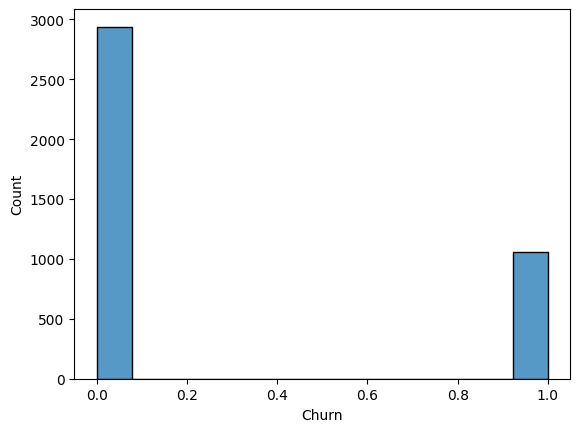

In [7]:
sns.histplot(gym_churn['Churn'])
plt.show()

Building a correlation matrix 

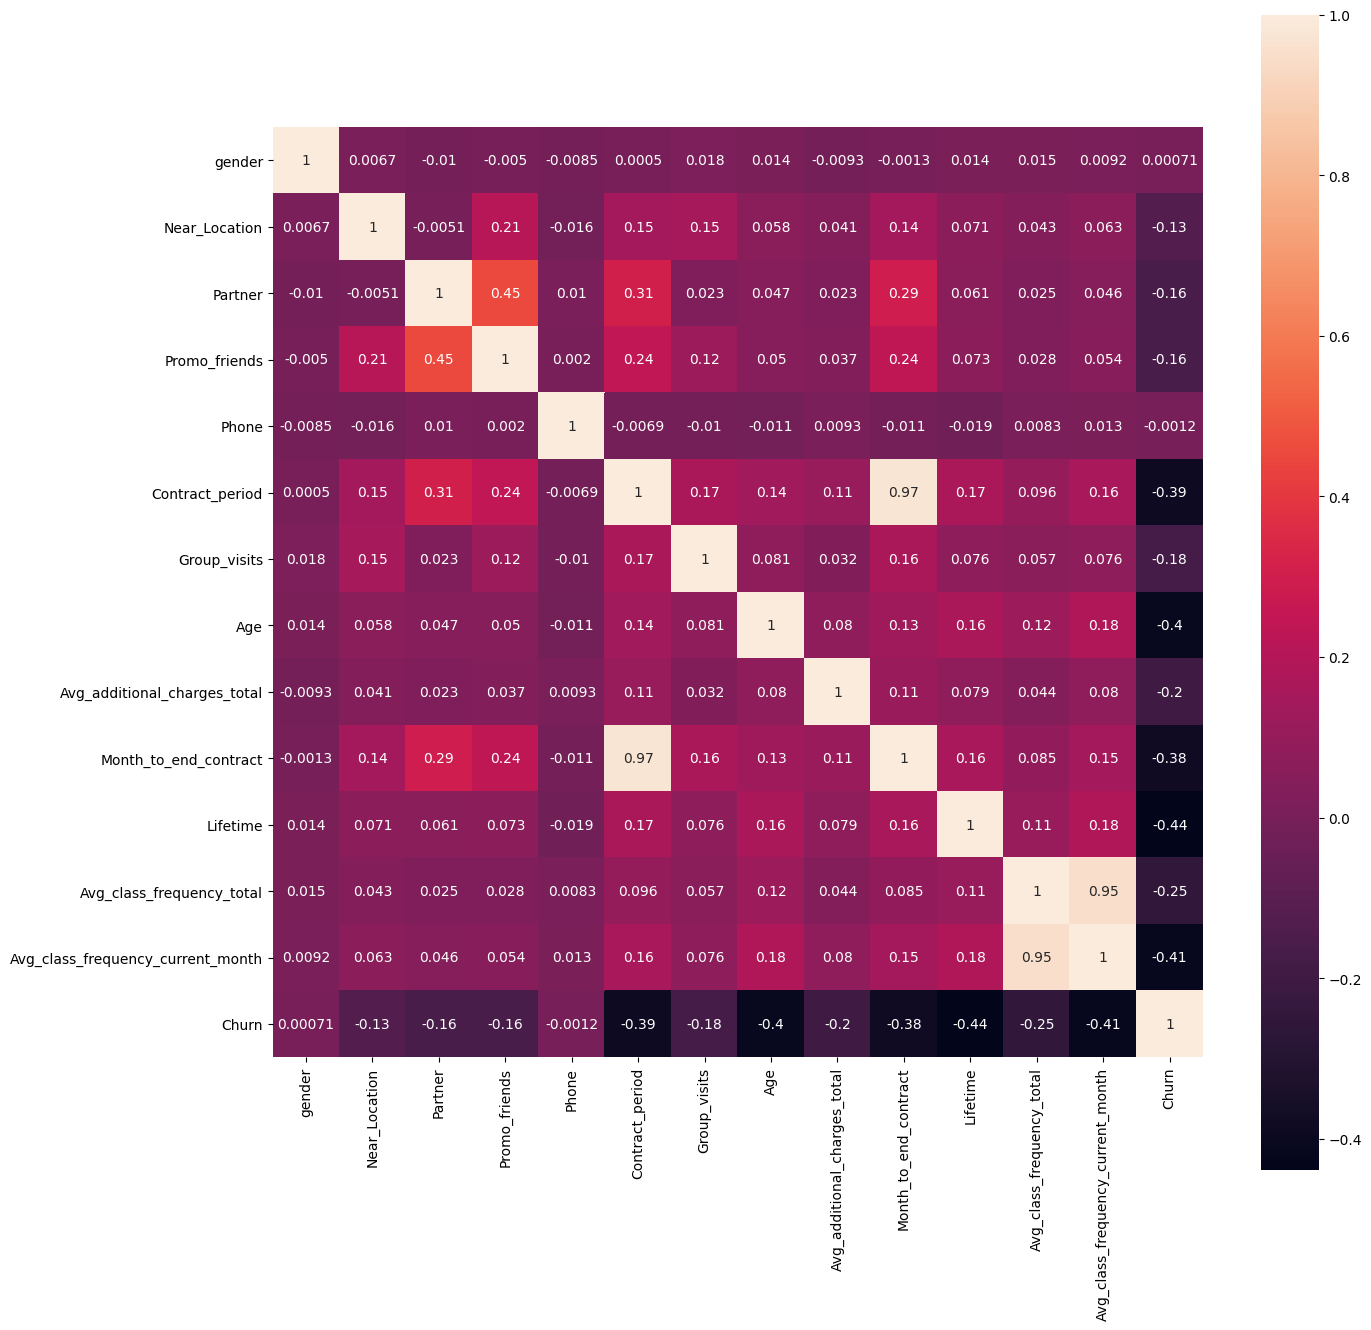

In [8]:
#creating correlation matrix
cm = gym_churn.corr()

#plotting the correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,square=True)
plt.show()

## Model Building 
<div id='mb'></div>

In [9]:
#creating features
X = gym_churn.drop(columns=['Month_to_end_contract'])
y = gym_churn['Month_to_end_contract']

In [10]:
#dividing the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
#creating a StandardScaler object and applying it to train and test set
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [12]:
#creating list of models
models = [LogisticRegression(),RandomForestClassifier()]

In [13]:
#creating function that calculate MAPE
def mape(y_true,y_pred):
    y_error = y_true - y_pred
    y_error_abs = [abs(i) for i in y_error]
    perc_error_abs = y_error_abs/y_true
    return (perc_error_abs.sum()/len(y_true))

In [14]:
#creating function that uses model that inputs data and outputs metrics
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('MAE:{:.2f} MSE:{:.2f} MAPE:{:.2f} R2:{:.2f}'.format(mean_absolute_error(y_test, y_pred),
                                                              mean_squared_error(y_test, y_pred),
                                                              mape(y_test, y_pred),
                                                              r2_score(y_test, y_pred)))

In [15]:
#creating loop that'll output metrics
for i in models:
    print(i)
    make_prediction(m=i,X_train = X_train_st, y_train = y_train, X_test = X_test_st, y_test = y_test)

LogisticRegression()
MAE:0.33 MSE:1.14 MAPE:0.06 R2:0.94
RandomForestClassifier()
MAE:0.34 MSE:1.09 MAPE:0.06 R2:0.94


Comment: Both models perform really well however LogisticRegression appears to perform better as it has a smaller mean absolute error and mean squared error compared to the RandomForestClassifier.

## Creating Clusters 
<div id='cluster'></div>

In [16]:
#standadise the data
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

linked = linkage(X_sc, method = 'ward')

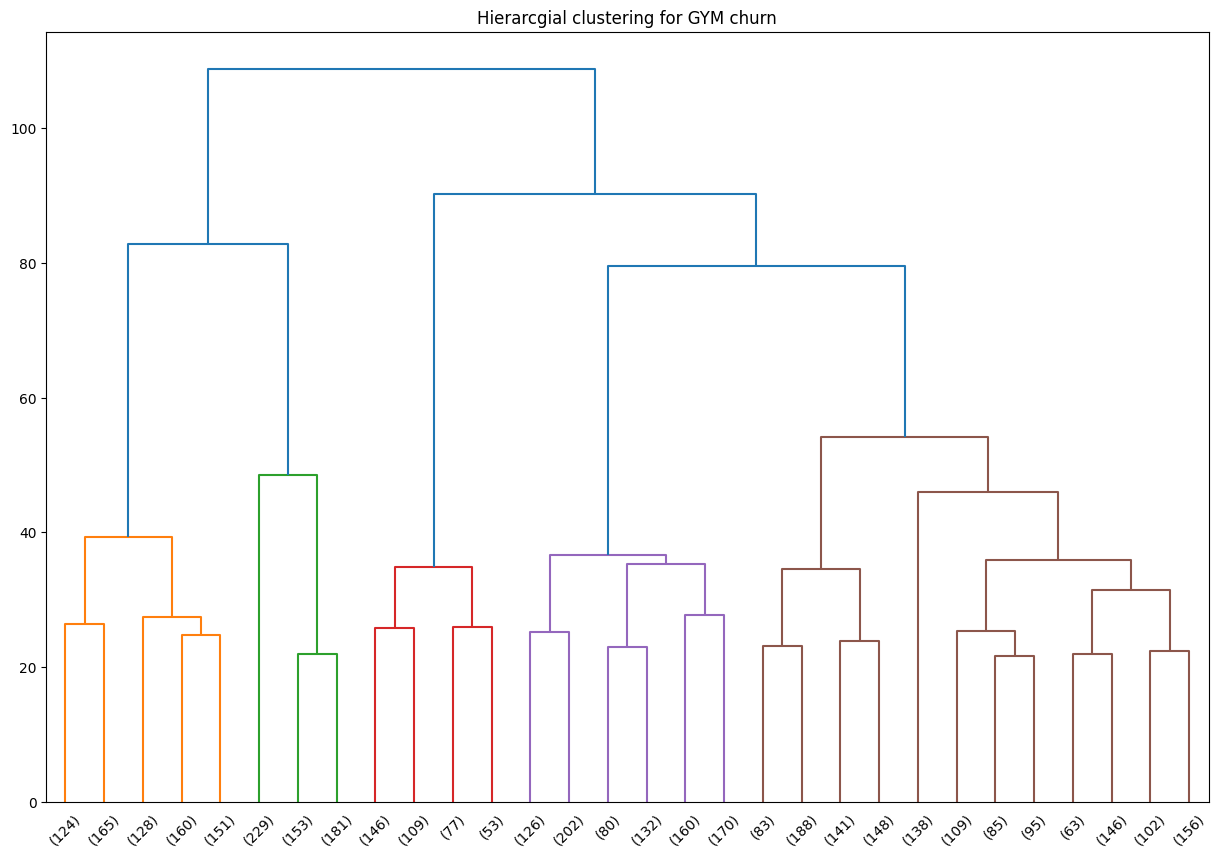

In [17]:
#plotting dendogram
plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top', truncate_mode='lastp')
plt.title('Hierarcgial clustering for GYM churn')
plt.show()

In [18]:
#defining kmeans and number of clusters
km = KMeans(n_clusters=5)
labels = km.fit_predict(X_sc)
#storing cluster labels into dataset
gym_churn['cluster_km'] = labels


In [19]:
#getting mean feature values per cluster
gym_churn.groupby(['cluster_km']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.479241,0.997628,0.338078,0.049822,0.883749,4.793594,0.424674,30.147094,160.376291,4.476868,4.772242,1.190822,1.189144,0.001186
1,0.501773,0.000000,0.491135,0.072695,0.911348,2.828014,0.219858,28.492908,133.875646,2.654255,2.838652,1.635086,1.448764,0.436170
2,0.559633,0.948394,0.324541,0.088303,0.926606,5.139908,0.475917,30.024083,160.676942,4.685780,4.833716,2.998944,3.005491,0.002294
3,0.493976,0.991238,0.909091,0.980285,0.899233,7.877327,0.561884,29.904710,158.303749,7.189485,4.685652,1.947053,1.947344,0.006572
4,0.513614,1.000000,0.336634,0.221535,0.898515,1.751238,0.295792,26.941832,114.393832,1.695545,0.967822,1.481794,1.051909,0.997525


In [20]:
#function to plot paired features for clusters
def show_clusters_on_plot(df,x_name,y_name,cluster_name):
    plt.figure(figsize=(10,10))
    sns.scatterplot(x=df[x_name],y=df[y_name],hue=df[cluster_name],palette='Paired')
    plt.title('{} vs {}'.format(x_name,y_name))
    plt.show()

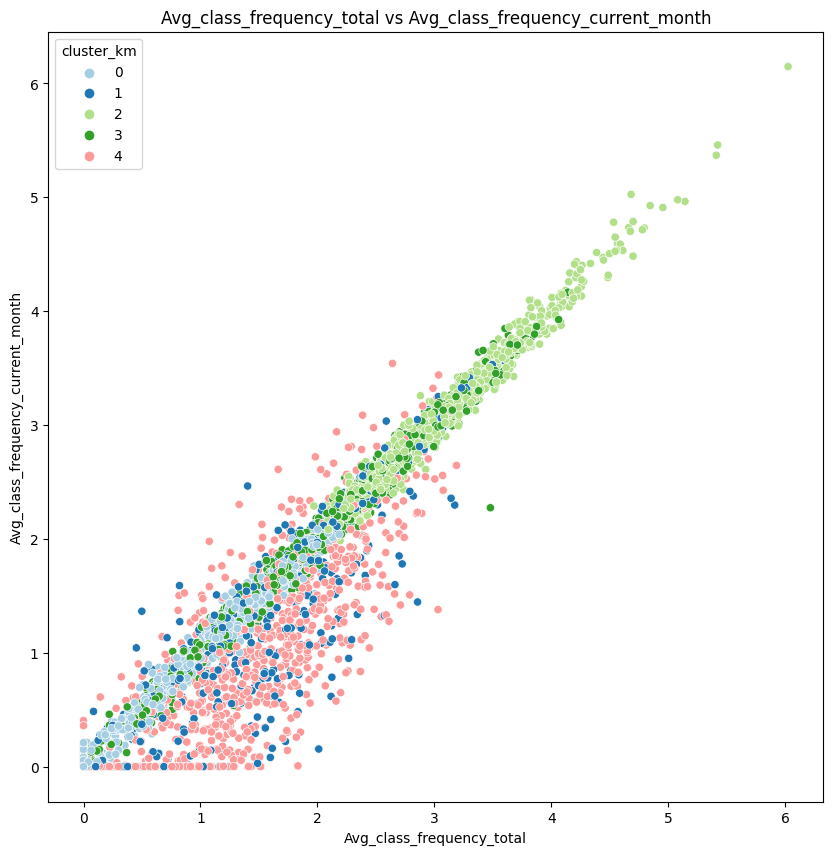

In [21]:
#graph of paired features
show_clusters_on_plot(gym_churn, 'Avg_class_frequency_total',
'Avg_class_frequency_current_month', 'cluster_km')

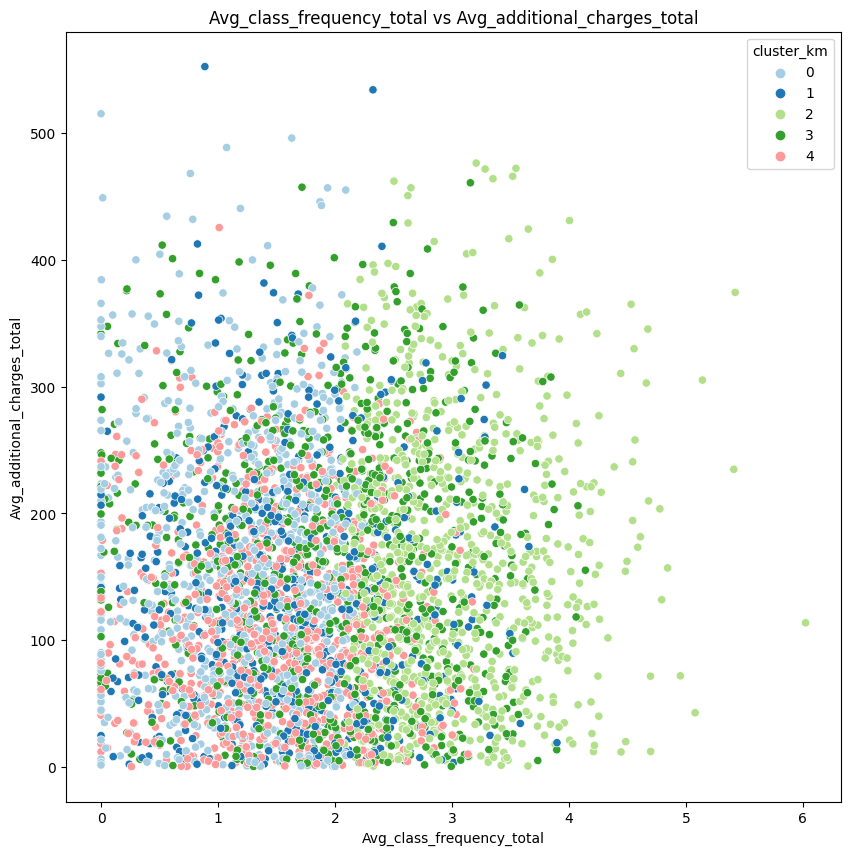

In [22]:
#graph of paired features
show_clusters_on_plot(gym_churn, 'Avg_class_frequency_total',
'Avg_additional_charges_total', 'cluster_km')

Comment: Whats observed above is that clusters' 0 and 3 are spread through out. Cluster 2 and 4 are heavily populated on the left and centre and cluster 1 is heavily populated on the centre and right. In other words, cluster 0 and 3 have a spread out average class frequency between 0 and 6. Cluster 2 and 4 have a average class frequency that lies between 0 and 2 and cluster one lying above 2. 

In [23]:
#calculating churn rate
churn_rate_cluster = gym_churn.groupby('cluster_km').agg({'Churn':'mean'}).reset_index()
churn_rate_cluster.columns = ['cluster_km', 'Churn_Rate']
churn_rate_cluster

,cluster_km,Churn_Rate
0,0,0.001186
1,1,0.436170
2,2,0.002294
3,3,0.006572
4,4,0.997525


Comment:
Cluster 2 has the highest churn rate impying most clients in cluster 2 are prone to leaving. Clients in cluster 0 are the second likely clients prone to leave. However they are less likely too. Clients in cluster 1,3 and 4 are the loyal clusters.

## Conclusion
<div id='conclusion'></div>

- The marketing department can investigate cluster 2's high churn rate. The average class frequency total is below 2. The marketing department can study why cluster 4 has similar average class frequency total then implement the strategies to cluster 2.
- The marketing department can also look at cluster 1's success then implement those strategies to cluster 0 to reduce the churn rate of cluster 0 to the level of cluster 1,3 and 4.
- The marketing department can also investigate all the clusters that have a average class frequency total of more than 0, maybe this will increase clients experience therefore improve retention rate.